# Install dependencies

In [1]:
!pip install git+https://github.com/openai/whisper.git
!sudo apt update && sudo apt install ffmpeg

  Cloning https://github.com/openai/whisper.git to /tmp/pip-req-build-0oo9oirj
  Running command git clone --filter=blob:none --quiet https://github.com/openai/whisper.git /tmp/pip-req-build-0oo9oirj
  Resolved https://github.com/openai/whisper.git to commit 90db0de1896c23cbfaf0c58bc2d30665f709f170
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.5/209.5 MB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 48.9 MB/s eta 0:00:00
  Created wheel for openai-whisper: filename=openai_whisper-20240930-py3-none-any.whl size=803583 sha256=152832b656c078544ff3b90964d62cc84dd7627560aa28fe3f0f5162c90f33e0
  Stored in directory: /tmp/pip-ephem-wheel-cache-at01p370/wheels/8b/6c/d0/622666868c179f156cf595c8b6f06f88bc5d80c4b31dccaa03
Successfully built openai-whisper
Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,

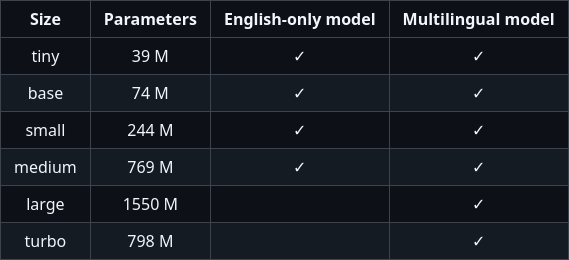

# Phrase-to-Phrase Transcription/Translation

In [17]:
# !whisper "38c3.mp4" --model large #---- transcribe
!whisper "38c3.mp4" --model large --task translate #---- translate, turbo model can't translate

/usr/local/lib/python3.10/dist-packages/whisper/__init__.py:150: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(fp, map_location=device)
Detecting lan

# Word-to-word transcription/translation

In [20]:
!pip install -U git+https://github.com/jianfch/stable-ts.git

import stable_whisper
model = stable_whisper.load_model('medium')
# result = model.transcribe('38c3.mp4')                      ----Transcribe
#result = model.transcribe('38c3.mp4', task="translate")     ----Translate

result.to_srt_vtt('pop.srt', segment_level=False)

  Cloning https://github.com/jianfch/stable-ts.git to /tmp/pip-req-build-z125wzio
  Running command git clone --filter=blob:none --quiet https://github.com/jianfch/stable-ts.git /tmp/pip-req-build-z125wzio
  Resolved https://github.com/jianfch/stable-ts.git to commit 158559a3ed8f9bcd3929dc6d6dd4c48c6f6b4427
  Preparing metadata (setup.py) ... done


/usr/local/lib/python3.10/dist-packages/stable_whisper/whisper_compatibility.py:270: UserWarning: The installed version of Whisper might be incompatible.
The detected version appears to be installed from the repository which can have compatibility issues due to multiple commits sharing the same version number. It is recommended to install version 20240930 from PyPI.
To prevent errors and performance issues, install the latest compatible version: `pip install openai-whisper==20240930` 
Use `ignore_compatibility=True` to ignore this warning. Or use transcribe_minimal().
  warnings.warn(compatibility_warning)
/usr/local/lib/python3.10/dist-packages/stable_whisper/whisper_word_level/original_whisper.py:310: UserWarning: Word-level timestamps on translations may not be reliable.
  warnings.warn("Word-level timestamps on translations may not be reliable.")
Translate:   0%|          | 0/2581.52 [00:00<?, ?sec/s]

Detected language: german


Translate: 100%|██████████| 435.65/435.65 [00:56<00:00,  7.69sec/s]


Saved: /content/pop.srt


In [22]:
# Adjustments for word-to-word subtitles
import re
from datetime import datetime, timedelta

def parse_time(time_str):
    return datetime.strptime(time_str, '%H:%M:%S,%f')

def format_time(dt):
    return dt.strftime('%H:%M:%S,%f')[:-3]

def process_srt(input_file, output_file):
    with open(input_file, 'r', encoding='utf-8') as f:
        content = f.read()

    # Split the content into subtitle blocks
    subtitle_blocks = re.split(r'\n\n', content.strip())

    processed_blocks = []
    for i in range(len(subtitle_blocks)):
        current_block = subtitle_blocks[i].split('\n')

        if len(current_block) < 3:  # Skip invalid blocks
            continue

        # Process timing
        times = current_block[1].split(' --> ')
        start_time = parse_time(times[0])
        end_time = parse_time(times[1])

        # Check if we need to adjust the end time
        if i < len(subtitle_blocks) - 1:
            next_block = subtitle_blocks[i+1].split('\n')
            if len(next_block) >= 3:
                next_start_time = parse_time(next_block[1].split(' --> ')[0])

                # Check if the current dialogue doesn't end with , . or ?
                if not current_block[-1].strip().endswith((',', '.', '?')):
                    # Adjust end_time to be the same as next_start_time
                    end_time = next_start_time

        # Update the timing line
        current_block[1] = f"{format_time(start_time)} --> {format_time(end_time)}"

        processed_blocks.append('\n'.join(current_block))

    # Write the processed content to the output file
    with open(output_file, 'w', encoding='utf-8') as f:
        f.write('\n\n'.join(processed_blocks))

# Usage
input_file = 'pop.srt'
output_file = 'finale.srt'
process_srt(input_file, output_file)